In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19   #transfer learning model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

NameError: ignored

In [ ]:
folders

['/content/drive/MyDrive/Dataset/train/corn_cercospora leaf spot gray leaf spot',
 '/content/drive/MyDrive/Dataset/train/corn_common rust',
 '/content/drive/MyDrive/Dataset/train/corn_healthy',
 '/content/drive/MyDrive/Dataset/train/corn_northern leaf blight',
 '/content/drive/MyDrive/Dataset/train/grape_black rot',
 '/content/drive/MyDrive/Dataset/train/grape_healthy',
 '/content/drive/MyDrive/Dataset/train/grape_leaf blight (isariopsis leaf spot)',
 '/content/drive/MyDrive/Dataset/train/grape_esca (black measles)',
 '/content/drive/MyDrive/Dataset/train/orange_haunglongbing (citrus greening)',
 '/content/drive/MyDrive/Dataset/train/potato_early blight',
 '/content/drive/MyDrive/Dataset/train/potato_late blight',
 '/content/drive/MyDrive/Dataset/train/potato_healthy',
 '/content/drive/MyDrive/Dataset/train/Rice_BrownSpot',
 '/content/drive/MyDrive/Dataset/train/Rice_Healthy',
 '/content/drive/MyDrive/Dataset/train/Rice_Hispa',
 '/content/drive/MyDrive/Dataset/train/Rice_LeafBlast',
 '

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2117 images belonging to 19 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1553 images belonging to 19 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [ ]:
len(training_set)
len(test_set)

49

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  #callbacks=[early_stop],verbose=True
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
67/67 [==============================] - 2787s 42s/step - loss: 0.5005 - accuracy: 0.8512 - val_loss: 0.3681 - val_accuracy: 0.8603
Epoch 2/2
67/67 [==============================] - 2773s 42s/step - loss: 0.2913 - accuracy: 0.8999 - val_loss: 0.2545 - val_accuracy: 0.9028


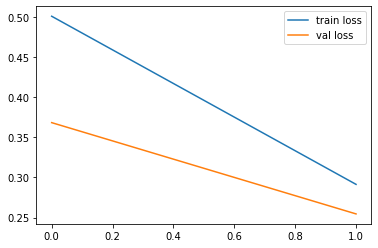

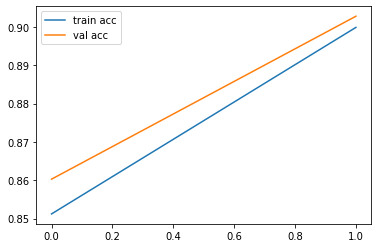

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

49/49 [==============================] - 1172s 24s/step


In [ ]:
y_pred

array([[4.37402128e-11, 1.19848145e-10, 1.13381596e-11, ...,
        5.19555833e-05, 7.54486561e-01, 1.03315176e-03],
       [1.15099166e-10, 1.33884598e-10, 6.91899619e-12, ...,
        9.83818336e-06, 5.10191421e-06, 2.69733914e-06],
       [2.46033684e-12, 4.44281547e-12, 7.05188783e-13, ...,
        7.14993575e-08, 7.00788618e-08, 1.40805545e-09],
       ...,
       [3.40595635e-10, 2.32923486e-10, 9.11192163e-11, ...,
        2.53273513e-09, 1.28779334e-07, 2.31955182e-05],
       [2.58679623e-11, 1.79978935e-10, 7.39449214e-12, ...,
        3.32656835e-09, 1.44462149e-07, 4.69308907e-05],
       [1.38550492e-14, 8.87056355e-15, 2.73480617e-15, ...,
        7.50560725e-12, 9.31546840e-09, 2.82712325e-08]], dtype=float32)

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/model2_vgg19.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/Dataset/model1_vgg19.h5')

1/1 [==============================] - 1s 848ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  2.9869505e-16 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
4
Strawberry_healthy


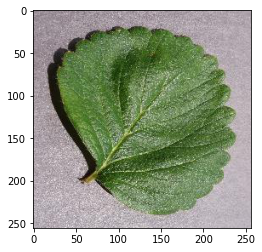

In [ ]:
img = image.load_img('/content/drive/MyDrive/Dataset/test/Strawberry_healthy/02caa98d-1c74-43b3-b3ee-e8492998f82a___RS_HL 2090.JPG', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)
if index1==0:
    print('Rice_BrownSpot')
elif index1==1:
    print('Rice_Healthy')
elif index1==2:
  print('Rice_Hispa')
elif index1==3:
  print('Rice_LeafBlast')
elif index1==4:
  print('Strawberry_healthy')
elif index1==5:
  print('Strawberry_leaf scorch')
elif index1==6:
  print('corn_cercospora leaf spot gray leaf spot')
elif index1==7:
  print('corn common rust')
elif index1==8:
  print('corn healthy')
elif index1==9:
  print('corn_northern leaf blight')
elif index1==10:
  print('grape_black rot')
elif index1==11:
  print('grape_esca (black measles)')
elif index1==12:
  print('grape_healthy')
elif index1==13:
  print('grape_leaf blight (isariopsis leaf spot)')
elif index1==14:
  print('orange_haunglongbing (citrus greening)')
elif index1==15:
  print('potato_early blight')
elif index1==16:
  print('potato_healthy')
elif index1==17:
  print('potato_late blight')
else:
  print('tomato_bacterial spot')